## Import Statements

In [1]:
import pandas as pd
import json
import glob
from scipy import stats
import itertools
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

from matplotlib import font_manager
font_path = '/Users/abhik_bhattacharjee/Desktop/TextAnalytics/newcomputermodern/NewCM10-Regular.otf'
font_manager.fontManager.addfont(font_path)
prop = font_manager.FontProperties(fname=font_path)

plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = prop.get_name()

## Load the Likert Response Analysis

In [2]:
# meanLikert = pd.read_excel("MULTISIMO Corpus - Questionnaire - Likert Scale (Responses).xlsx", sheet_name="Pivot-Mean")
# medianLikert = pd.read_excel("MULTISIMO Corpus - Questionnaire - Likert Scale (Responses).xlsx", sheet_name="Pivot-Median")
# stdDevLikert = pd.read_excel("MULTISIMO Corpus - Questionnaire - Likert Scale (Responses).xlsx", sheet_name="Pivot-StdDev")

meanLikert = pd.read_excel("rawResponseNew.xlsx", sheet_name="Final")

In [3]:
meanLikert.Question

0     Are you satisfied with the level of collaborat...
1     Do you think the group is effective in achievi...
2     Do you feel the group works well together as a...
3     Is the turn taking frequency too high amongst ...
4           Was participant 1 active in the discussion?
5           Was participant 2 active in the discussion?
6         Was participant 1 dominant in the discussion?
7         Was participant 2 dominant in the discussion?
8     Was the mediator interfering in the brainstorm...
9     Were the participants collaborating without an...
10    Do you think the discussion amongst the partic...
Name: Question, dtype: object

## Speaker Durations

In [4]:
dfs = []
files = glob.glob("drive-download-20230412T174432Z-001/S*_audio_STE_speaker_duration_.json")

In [5]:
for file in files:
    df = pd.read_json(file, lines=True)
    file_version = file.split("/")[1]
    df['file_version'] = file_version
    dfs.append(df)
speakerDuration = pd.concat(dfs)

In [6]:
speakerDuration = speakerDuration.fillna(0)
speakerDuration = speakerDuration.drop('SPEAKER_04', axis = 1)
speakerDuration = speakerDuration.drop('SPEAKER_03', axis = 1)
speakerDuration['SPEAKER_00'] = speakerDuration['SPEAKER_00'] = pd.to_timedelta(speakerDuration['SPEAKER_00'])
speakerDuration['SPEAKER_00'] = speakerDuration['SPEAKER_00'].dt.total_seconds()
speakerDuration['SPEAKER_01'] = speakerDuration['SPEAKER_01'] = pd.to_timedelta(speakerDuration['SPEAKER_01'])
speakerDuration['SPEAKER_01'] = speakerDuration['SPEAKER_01'].dt.total_seconds()
speakerDuration['SPEAKER_02'] = speakerDuration['SPEAKER_02'] = pd.to_timedelta(speakerDuration['SPEAKER_02'])
speakerDuration['SPEAKER_02'] = speakerDuration['SPEAKER_02'].dt.total_seconds()

In [7]:
speakerDuration.head()

,SPEAKER_00,SPEAKER_01,SPEAKER_02,file_version
0,35.384,220.488,34.847,S04_audio_STE_speaker_duration_.json
0,227.469,225.751,174.553,S17_audio_STE_speaker_duration_.json
0,46.846,185.640,204.341,S20_audio_STE_speaker_duration_.json
0,117.890,104.961,385.946,S08_audio_STE_speaker_duration_.json
0,128.809,311.631,149.383,S13_audio_STE_speaker_duration_.json


## Diarization - Raw Audio Files

In [8]:
with open("drive-download-20230412T174432Z-001/diarization_stats_1.json", "r") as file:
    data = file.read()

diarization1 = pd.read_json(data, orient = 'index')

In [9]:
with open("drive-download-20230412T174432Z-001/diarization_stats_2.json", "r") as file:
    data = file.read()

diarization2 = pd.read_json(data, orient = 'index')

In [10]:
diarization2 = diarization2[:-1]
diarization1 = diarization1[:-1]

In [11]:
diarization2.head()

,duration,num_overlapping,num_turns
S02_audio_STE.wav,581,83,141
S03_audio_STE.wav,357,53,102
S04_audio_STE.wav,684,76,197
S05_audio_STE.wav,629,58,154
S07_audio_STE.wav,613,91,136


## Spearman Correlation

Results suggest the following –
1. Spearman's rank correlation coefficient (Rho) is very low (-0.30213898942795014)
    - Suggests weak negative correlation
2. p-Value (0.2230062998628679) is higher then the threshold
    - Suggests Correlation not statistically significant

In [12]:
check1 = itertools.islice(meanLikert.transpose()[1].tolist(), 1, None)
list1 = []

for i in check1:
    list1.append(i)

In [13]:
res = stats.spearmanr(diarization1['num_turns'].tolist(), list1)

In [14]:
resOverlap = stats.spearmanr(diarization1['num_overlapping'].tolist(), list1)

In [15]:
res

SpearmanrResult(correlation=0.42031057728999377, pvalue=0.08243967071677614)

In [16]:
resOverlap

SpearmanrResult(correlation=0.2758705705045311, pvalue=0.26783114671450536)

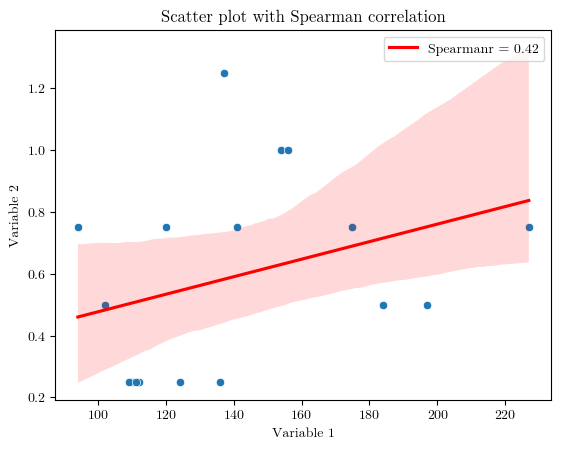

In [17]:
sns.scatterplot(x=diarization1['num_turns'], y=list1)
sns.regplot(x=diarization1['num_turns'], y=list1, scatter=False, color='r', 
            label=r'Spearmanr = {:.2f}'.format(res.correlation))

plt.xlabel('Variable 1')
plt.ylabel('Variable 2')
plt.title('Scatter plot with Spearman correlation')

plt.legend()
plt.show()

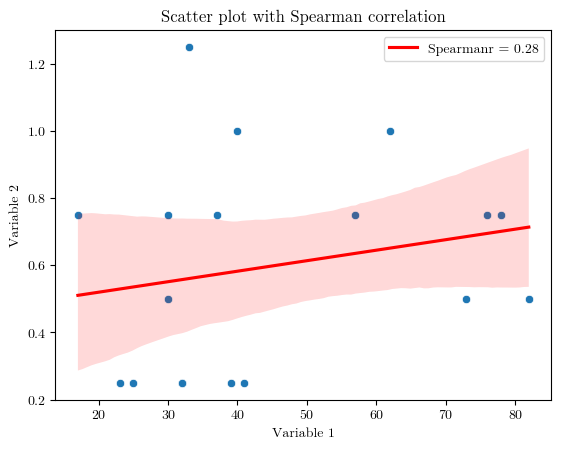

In [18]:
sns.scatterplot(x=diarization1['num_overlapping'], y=list1)
sns.regplot(x=diarization1['num_overlapping'], y=list1, scatter=False, color='r', 
            label=r'Spearmanr = {:.2f}'.format(resOverlap.correlation))

plt.xlabel('Variable 1')
plt.ylabel('Variable 2')
plt.title('Scatter plot with Spearman correlation')

plt.legend()
plt.show()

## Kendall's Tau

Similar results as the Spearman's correlation
- Statistically not relevant

In [19]:
res1 = stats.kendalltau(diarization1['num_turns'].tolist(), list1)
correlation_coefficient = res1.correlation
p_value = res1.pvalue

print("Kendall's tau correlation coefficient:", correlation_coefficient)
print("P-value:", p_value)

if p_value < 0.05:
    print("The correlation is statistically significant at the 0.05 level.")
else:
    print("The correlation is not statistically significant at the 0.05 level.")

Kendall's tau correlation coefficient: 0.2453684193449784
P-value: 0.19030423357943005
The correlation is not statistically significant at the 0.05 level.


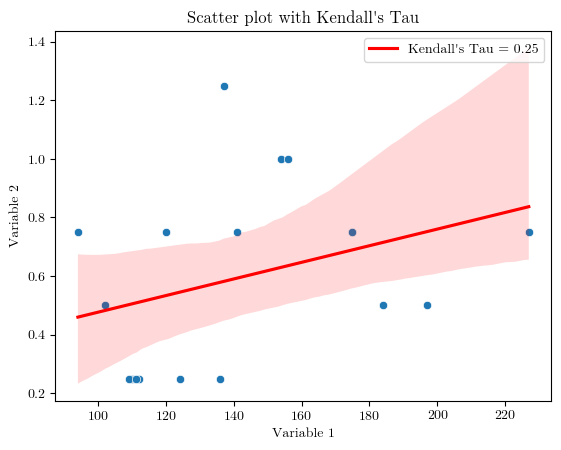

In [20]:
sns.scatterplot(x=diarization1['num_turns'], y=list1)
sns.regplot(x=diarization1['num_turns'], y=list1, scatter=False, color='r', 
            label=r"Kendall's Tau = {:.2f}".format(res1.correlation))

plt.xlabel('Variable 1')
plt.ylabel('Variable 2')
plt.title('Scatter plot with Kendall\'s Tau')

plt.legend()
plt.show()

In [21]:
res1 = stats.kendalltau(diarization1['num_overlapping'].tolist(), list1)
correlation_coefficient = res1.correlation
p_value = res1.pvalue

print("Kendall's tau correlation coefficient:", correlation_coefficient)
print("P-value:", p_value)

if p_value < 0.05:
    print("The correlation is statistically significant at the 0.05 level.")
else:
    print("The correlation is not statistically significant at the 0.05 level.")

Kendall's tau correlation coefficient: 0.17903967769306234
P-value: 0.3405504236705169
The correlation is not statistically significant at the 0.05 level.


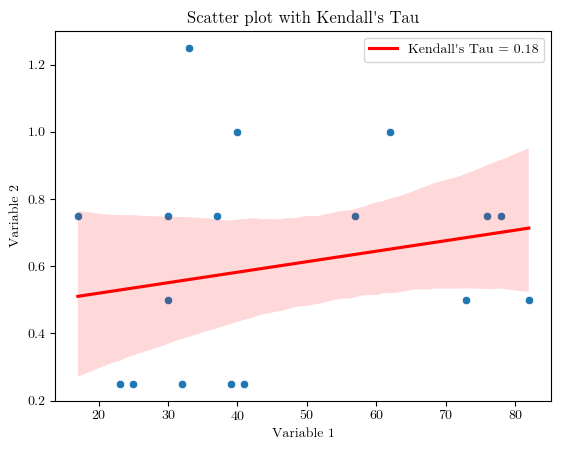

In [22]:
sns.scatterplot(x=diarization1['num_overlapping'], y=list1)
sns.regplot(x=diarization1['num_overlapping'], y=list1, scatter=False, color='r', 
            label=r"Kendall's Tau = {:.2f}".format(res1.correlation))

plt.xlabel('Variable 1')
plt.ylabel('Variable 2')
plt.title('Scatter plot with Kendall\'s Tau')

plt.legend()
plt.show()

## Point Biserial

In [23]:
res2 = stats.pointbiserialr(diarization1['num_turns'].tolist(), list1)
correlation_coefficient = res2.correlation
p_value = res2.pvalue

print("Point-biserial correlation coefficient:", correlation_coefficient)
print("P-value:", p_value)

if p_value < 0.05:
    print("The correlation is statistically significant at the 0.05 level.")
else:
    print("The correlation is not statistically significant at the 0.05 level.")

Point-biserial correlation coefficient: 0.3374181703697396
P-value: 0.1708957831612063
The correlation is not statistically significant at the 0.05 level.


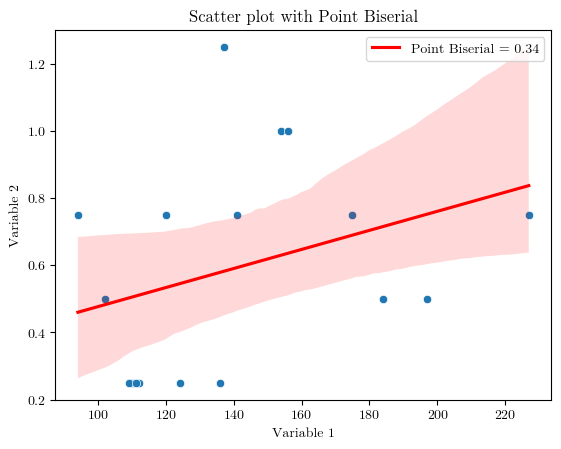

In [24]:
sns.scatterplot(x=diarization1['num_turns'], y=list1)
sns.regplot(x=diarization1['num_turns'], y=list1, scatter=False, color='r', 
            label=r"Point Biserial = {:.2f}".format(res2.correlation))

plt.xlabel('Variable 1')
plt.ylabel('Variable 2')
plt.title('Scatter plot with Point Biserial')

plt.legend()
plt.show()

In [25]:
res2 = stats.pointbiserialr(diarization1['num_overlapping'].tolist(), list1)
correlation_coefficient = res2.correlation
p_value = res2.pvalue

print("Point-biserial correlation coefficient:", correlation_coefficient)
print("P-value:", p_value)

if p_value < 0.05:
    print("The correlation is statistically significant at the 0.05 level.")
else:
    print("The correlation is not statistically significant at the 0.05 level.")

Point-biserial correlation coefficient: 0.20934104594333344
P-value: 0.40445379003483695
The correlation is not statistically significant at the 0.05 level.


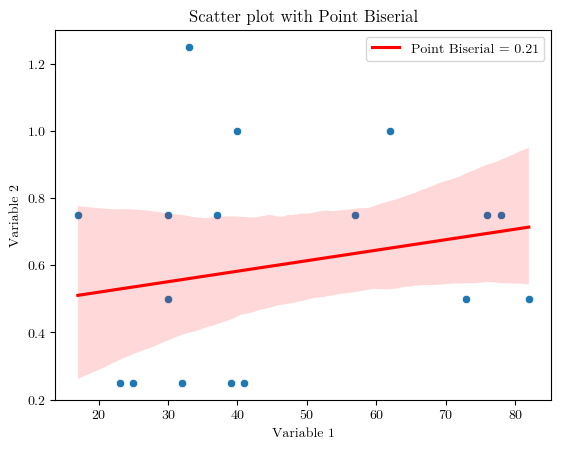

In [26]:
sns.scatterplot(x=diarization1['num_overlapping'], y=list1)
sns.regplot(x=diarization1['num_overlapping'], y=list1, scatter=False, color='r', 
            label=r"Point Biserial = {:.2f}".format(res2.correlation))

plt.xlabel('Variable 1')
plt.ylabel('Variable 2')
plt.title('Scatter plot with Point Biserial')

plt.legend()
plt.show()

## Combination
### Kendall's Tau and Point Biserial

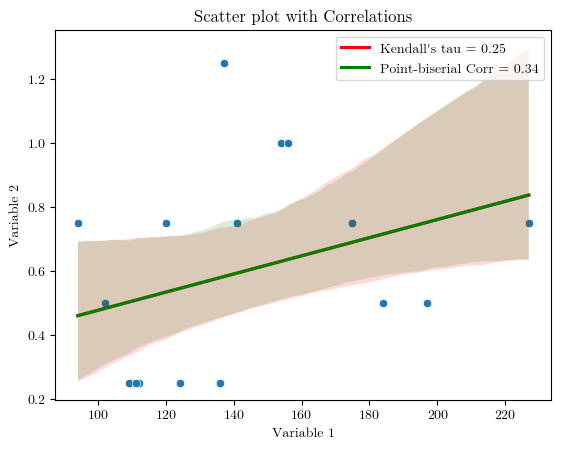

In [27]:
tau, _ = stats.kendalltau(diarization1['num_turns'].tolist(), list1)

pb_corr, _ = stats.pointbiserialr(diarization1['num_turns'].tolist(), list1)

sns.scatterplot(x=diarization1['num_turns'], y=list1)

sns.regplot(x=diarization1['num_turns'], y=list1, scatter=False, color='r', 
            label='Kendall\'s tau = {:.2f}'.format(tau))
sns.regplot(x=diarization1['num_turns'], y=list1, scatter=False, color='g', 
            label='Point-biserial Corr = {:.2f}'.format(pb_corr))

plt.xlabel('Variable 1')
plt.ylabel('Variable 2')
plt.title('Scatter plot with Correlations')

plt.legend()

plt.show()

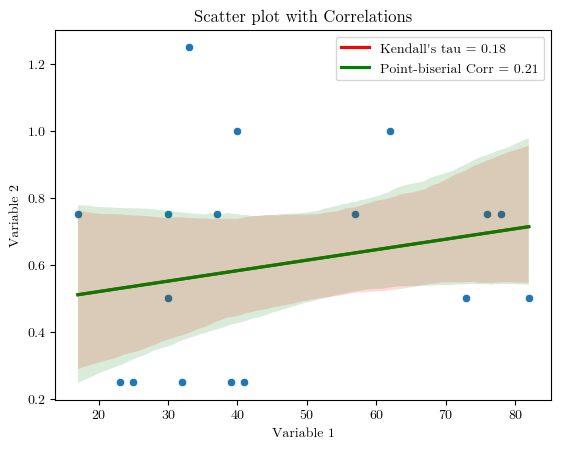

In [28]:
tau, _ = stats.kendalltau(diarization1['num_overlapping'].tolist(), list1)

pb_corr, _ = stats.pointbiserialr(diarization1['num_overlapping'].tolist(), list1)

sns.scatterplot(x=diarization1['num_overlapping'], y=list1)

sns.regplot(x=diarization1['num_overlapping'], y=list1, scatter=False, color='r', 
            label='Kendall\'s tau = {:.2f}'.format(tau))
sns.regplot(x=diarization1['num_overlapping'], y=list1, scatter=False, color='g', 
            label='Point-biserial Corr = {:.2f}'.format(pb_corr))

plt.xlabel('Variable 1')
plt.ylabel('Variable 2')
plt.title('Scatter plot with Correlations')

plt.legend()

plt.show()

## Bootstraping

In [29]:
num_bootstrap_samples = 1000

bootstrap_correlation_coefficients = np.empty(num_bootstrap_samples)

for i in range(num_bootstrap_samples):
    bootstrap_indices = np.random.choice(len(diarization1['num_turns']), len(diarization1['num_turns']), replace=True)
    bootstrap_sample_1 = np.array(diarization1['num_turns'])[bootstrap_indices]
    bootstrap_sample_2 = np.array(list1)[bootstrap_indices]

    res = stats.spearmanr(bootstrap_sample_1, bootstrap_sample_2)
    bootstrap_correlation_coefficients[i] = res.correlation

confidence_interval = np.percentile(bootstrap_correlation_coefficients, [2.5, 97.5])

print("Bootstrap results:")
print("Correlation coefficient:", np.mean(bootstrap_correlation_coefficients))
print("95% Confidence Interval:", confidence_interval)

if confidence_interval[0] <= res.correlation <= confidence_interval[1]:
    print("The original correlation coefficient is within the confidence interval.")
else:
    print("The original correlation coefficient is outside the confidence interval.")


Bootstrap results:
Correlation coefficient: 0.3914305175104659
95% Confidence Interval: [0.01657752 0.7112247 ]
The original correlation coefficient is within the confidence interval.


In [30]:
num_bootstrap_samples = 1000

bootstrap_correlation_coefficients = np.empty(num_bootstrap_samples)

for i in range(num_bootstrap_samples):
    bootstrap_indices = np.random.choice(len(diarization1['num_overlapping']), len(diarization1['num_overlapping']), replace=True)
    bootstrap_sample_1 = np.array(diarization1['num_overlapping'])[bootstrap_indices]
    bootstrap_sample_2 = np.array(list1)[bootstrap_indices]

    res = stats.spearmanr(bootstrap_sample_1, bootstrap_sample_2)
    bootstrap_correlation_coefficients[i] = res.correlation

confidence_interval = np.percentile(bootstrap_correlation_coefficients, [2.5, 97.5])

print("Bootstrap results:")
print("Correlation coefficient:", np.mean(bootstrap_correlation_coefficients))
print("95% Confidence Interval:", confidence_interval)

if confidence_interval[0] <= res.correlation <= confidence_interval[1]:
    print("The original correlation coefficient is within the confidence interval.")
else:
    print("The original correlation coefficient is outside the confidence interval.")


Bootstrap results:
Correlation coefficient: 0.2700285105781591
95% Confidence Interval: [-0.12334778  0.61805334]
The original correlation coefficient is within the confidence interval.


## Robust Regression

In [31]:
X = sm.add_constant(diarization1['num_turns'])

model = sm.RLM(list1, X, M=sm.robust.norms.HuberT())
results = model.fit()

print(results.summary())

                    Robust linear Model Regression Results                    
Dep. Variable:                      y   No. Observations:                   18
Model:                            RLM   Df Residuals:                       16
Method:                          IRLS   Df Model:                            1
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Sun, 16 Apr 2023                                         
Time:                        08:58:41                                         
No. Iterations:                    13                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1762      0.285      0.619      0.5

In [32]:
X = sm.add_constant(diarization1['num_overlapping'])

model = sm.RLM(list1, X, M=sm.robust.norms.HuberT())
results = model.fit()

print(results.summary())

                    Robust linear Model Regression Results                    
Dep. Variable:                      y   No. Observations:                   18
Model:                            RLM   Df Residuals:                       16
Method:                          IRLS   Df Model:                            1
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Sun, 16 Apr 2023                                         
Time:                        08:58:41                                         
No. Iterations:                     9                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.4337      0.177     

### Regression Line

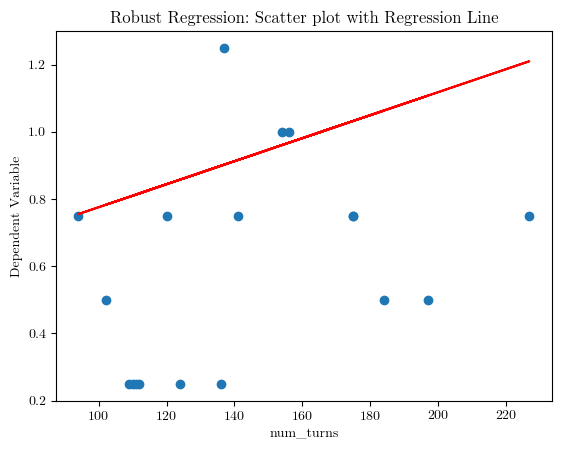

In [33]:
plt.scatter(diarization1['num_turns'], list1)
plt.plot(diarization1['num_turns'], results.predict(sm.add_constant(diarization1['num_turns'])), color='red')

plt.xlabel('num_turns')
plt.ylabel('Dependent Variable')
plt.title('Robust Regression: Scatter plot with Regression Line')

plt.show()

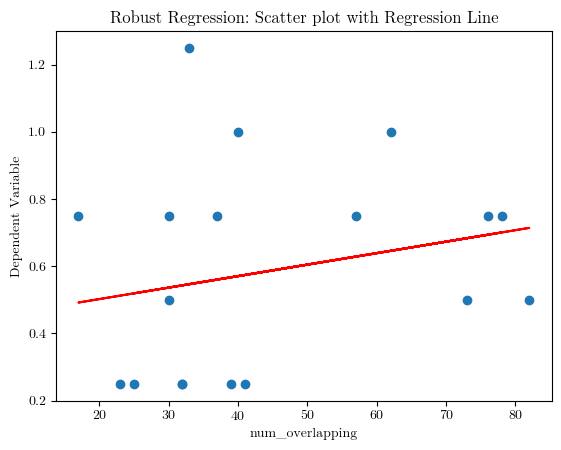

In [34]:
plt.scatter(diarization1['num_overlapping'], list1)
plt.plot(diarization1['num_overlapping'], results.predict(sm.add_constant(diarization1['num_overlapping'])), color='red')

plt.xlabel('num_overlapping')
plt.ylabel('Dependent Variable')
plt.title('Robust Regression: Scatter plot with Regression Line')

plt.show()

### Residual Plot

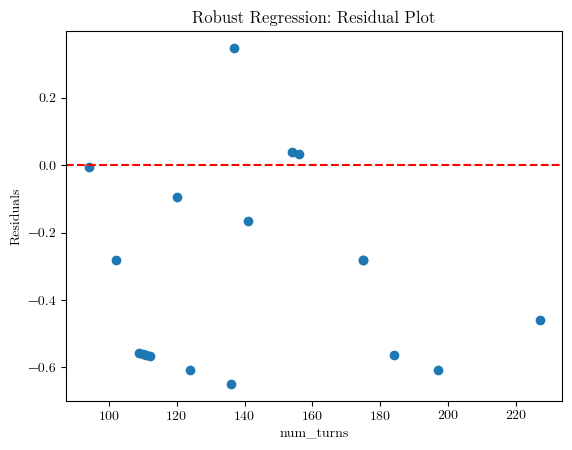

In [35]:
residuals = list1 - results.predict(sm.add_constant(diarization1['num_turns']))

plt.scatter(diarization1['num_turns'], residuals)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('num_turns')
plt.ylabel('Residuals')
plt.title('Robust Regression: Residual Plot')

plt.show()

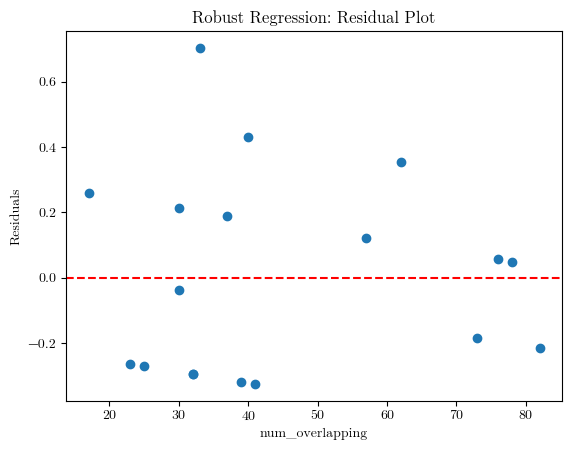

In [36]:
residuals = list1 - results.predict(sm.add_constant(diarization1['num_overlapping']))

plt.scatter(diarization1['num_overlapping'], residuals)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('num_overlapping')
plt.ylabel('Residuals')
plt.title('Robust Regression: Residual Plot')

plt.show()